In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [47]:
df=pd.read_csv('telecom_churn.csv')

df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [48]:
X=df.loc[:,'AccountWeeks':].values
y=df.loc[:,'Churn'].values


from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)



In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,3.138211,0.760811
1,3.087086,-1.141227
2,-0.711939,0.656365
3,-0.574675,1.818482
4,-1.330330,0.159803


,principal component 1,principal component 2,Churn
0,3.138211,0.760811,0
1,3.087086,-1.141227,0
2,-0.711939,0.656365,0
3,-0.574675,1.818482,0
4,-1.330330,0.159803,0


In [50]:

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    principalDf, y, test_size=0.10, random_state=42)


In [51]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)


In [52]:
from sklearn.metrics    import classification_report
from sklearn.metrics    import confusion_matrix

print("\nMLP classification report after applying PCA \n")
print(classification_report(y_test, y_pred, target_names = ["Stay", "Churn"]))


MLP classification report after applying PCA 

              precision    recall  f1-score   support

        Stay       0.89      0.99      0.94       280
       Churn       0.88      0.39      0.54        54

    accuracy                           0.89       334
   macro avg       0.88      0.69      0.74       334
weighted avg       0.89      0.89      0.87       334



In [53]:
confusion_mlp=confusion_matrix(y_test,y_pred)

print("confusion matrix for MLP classifier after applying PCA :\n{}".format(confusion_mlp))


confusion matrix for MLP classifier after applying PCA :
[[277   3]
 [ 33  21]]


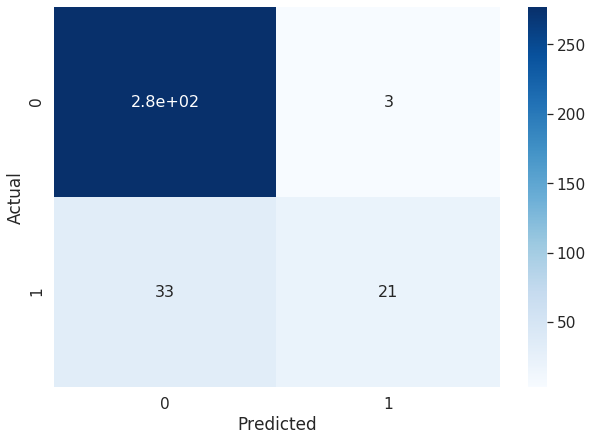

In [54]:
import seaborn as sn


df_cm = pd.DataFrame(confusion_mlp, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})